In [33]:
!pip install pytube openai
!pip install ffmpeg
!pip install yt-dlp openai
!pip install tf-keras
!pip install git+https://github.com/openai/whisper.git
!pip install yt-dlp
!pip install torch


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\guhen\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Check the permissions.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
Using cached tf_keras-2.19.0-py3-none-any.whl (1.7 MB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 1.9 MB/s eta 0:03:22
   ---------------------------------------- 1.0/376.0 MB 1.9 MB/s eta 0:03:14
   ---------------------------------------- 1.3/376.0 MB 1.9 MB/s eta 0:03:16
   ---------------------------------------- 1.8/376.0 MB 1.9 MB/s eta 0:03:17
   ---------------------------------------- 2.1/376.0 MB 1.8 MB/s eta 0:03:24
   ---------------------------------------- 2.4/3

  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git 'C:\Users\guhen\AppData\Local\Temp\pip-req-build-1uky8dwn'

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from pytube import *
import ffmpeg
import openai
import sys
from yt_dlp import YoutubeDL


In [ ]:
from pytube import YouTube

def baixar_audio_youtube(url, nome_arquivo='audio_transcrito'):
    yt = YouTube(link_do_vídeo)
    
    # Seleciona apenas stream de áudio
    audio_stream = yt.streams.filter(only_audio=True).first()
    
    # Baixa o áudio
    audio_stream.download(filename=nome_arquivo)
    print(f"Áudio salvo como: {nome_arquivo}")


CÓDIGO COM TOKEN PAGO DO WHISPER, FEITO PELA OPEN IA.

In [ ]:
import yt_dlp
import openai
import os
from api_senha import senha

# Autenticação
client = openai.OpenAI(api_key = senha)

def baixar_audio_ytdlp(url, caminho_destino, nome_arquivo='audio'):
    os.makedirs(caminho_destino, exist_ok=True)

    caminho_completo = os.path.join(caminho_destino, nome_arquivo + '.mp3')

    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': caminho_completo,
        'quiet': True,
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])
    
    print(f"✅ Áudio salvo em: {caminho_completo}")
    return caminho_completo

def transcrever_audio_novo(caminho_arquivo):
    with open(caminho_arquivo, "rb") as f:
        transcript = client.audio.transcriptions.create(
            model="whisper-1",
            file=f,
            response_format="text"
        )
    return transcript

# 🔁 USO
if __name__ == "__main__":
    link_do_vídeo = 'https://www.youtube.com/shorts/crV6ml-1neM'
    destino = r"C:\Users\guhen\programas\TRANSCREVERDOR-YT"
    nome = "audio_stormer"

    caminho_audio = baixar_audio_ytdlp(link_do_vídeo, destino, nome)
    texto = transcrever_audio_novo(caminho_audio)

    print("\n🔊 Transcrição:\n", texto)


✅ Áudio salvo em: C:\Users\guhen\programas\TRANSCREVERDOR-YT\audio_stormer.mp3


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

VERSÃO GRATUITA RONDANDO LOCALMENTE WHISPER OPEN SOURCE 

In [ ]:
import yt_dlp
import os
import whisper

def baixar_audio_ytdlp(url, caminho_destino, nome_arquivo='audio'):
    os.makedirs(caminho_destino, exist_ok=True)
    caminho_completo = os.path.join(caminho_destino, nome_arquivo + '.mp3')
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': caminho_completo,
        'quiet': True,
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])
    print(f"✅ Áudio salvo em: {caminho_completo}")
    return caminho_completo

def transcrever_whisper_local(caminho_arquivo, modelo="base"):
    # Modelos: tiny, base, small, medium, large (quanto maior, mais lento e preciso)
    print(f"🔎 Carregando modelo '{modelo}' do Whisper (pode demorar um pouco na 1ª vez)...")
    model = whisper.load_model(modelo)
    print("🎧 Transcrevendo o áudio, aguarde...")
    resultado = model.transcribe(caminho_arquivo)
    return resultado['text']

if __name__ == "__main__":
    link_do_vídeo = 'https://www.youtube.com/shorts/crV6ml-1neM'
    destino = r"C:\Users\guhen\programas\TRANSCREVERDOR-YT"
    nome = "audio_stormer"

    caminho_audio = baixar_audio_ytdlp(link_do_vídeo, destino, nome)
    texto = transcrever_whisper_local(caminho_audio, modelo="base") # ou "tiny" para mais rapidez

    print("\n🔊 Transcrição:\n", texto)


✅ Áudio salvo em: C:\Users\guhen\programas\TRANSCREVERDOR-YT\audio_stormer.mp3
🔎 Carregando modelo 'base' do Whisper (pode demorar um pouco na 1ª vez)...


100%|███████████████████████████████████████| 139M/139M [00:54<00:00, 2.69MiB/s]
C:\Users\guhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have f

🎧 Transcrevendo o áudio, aguarde...


C:\Users\guhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\whisper\transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



🔊 Transcrição:
  E aí galera, beleza, tudo bem com vocês? Estamos começando o nosso café tercoessões. Primeiro dia da semana, dia 19 de maio de 2025, estamos começando, são 15 horas, cinco minutos e vamos começar a conversar um pouquinho sobre o que está movendo o mercado neste instante. A gente viu que na sexta-feira passada, nós vemos então realmente um downgrade dos Estados Unidos pelo Amoriz e isso impactou o mercado. O mercado ficou, digamos assim, impactado logo no início, abrindo o mercado com um recuo mais importante. Seja aqui no Brasil, que depois recuperou e devolveu a alta como a gente está vendo, recuperou o movimento de queda e início, o movimento de alta. Seja no mercado americano, que a gente teve o SPILE, abrindo em queda importante. E logo depois da queda importante, está belecendo um ciclo de alta. Ecoperando, inclusive, conseguindo romper a máxima de sexta-feira. Então a gente está vendo realmente SPILE retomando movimentação de alta, inclusive fazendo um padrão qu

In [53]:
texto = "E aí galera, beleza, tudo bem com vocês? Estamos começando o nosso café tercoessões. Primeiro dia da semana, dia 19 de maio de 2025, estamos começando, são 15 horas, cinco minutos e vamos começar a conversar um pouquinho sobre o que está movendo o mercado neste instante. A gente viu que na sexta-feira passada, nós vemos então realmente um downgrade dos Estados Unidos pelo Amoriz e isso impactou o mercado. O mercado ficou, digamos assim, impactado logo no início, abrindo o mercado com um recuo mais importante. Seja aqui no Brasil, que depois recuperou e devolveu a alta como a gente está vendo, recuperou o movimento de queda e início, o movimento de alta. Seja no mercado americano, que a gente teve o SPILE, abrindo em queda importante. E logo depois da queda importante, está belecendo um ciclo de alta. Ecoperando, inclusive, conseguindo romper a máxima de sexta-feira. Então a gente está vendo realmente SPILE retomando movimentação de alta, inclusive fazendo um padrão que eu chamo de gap de compra, em que ele abre abaixo da mínima do dia anterior e rompe essa mínima para cima e estabelece o movimento de alta pelo resto do dia. Seja no próprio que é aqui, que também faz o mesmo padrão, em que abem, então, no gap de baixa prodido pelo rebaixamento da Moods de sexta, rompe essa mínima para cima e estabelece um dia de alta com o objetivo de voltar para o topo histórico do que é aqui. Seja no próprio Bitcoin, que abriu no movimento de queda durante a madrugada, a gente está vendo isso daqui. Então, o Bitcoin vinha como objetivo, na verdade estava, inclusive, rompendo a região de resistência do 105 mil dólares no domingo. Quando terminou domingo, simplesmente a antropressão de venda na madrugada e durante a madrugada aconteceu esse movimento de queda maior observado. Essa queda aqui agora está sendo completamente negada. Então, estamos negando o movimento de queda, estamos instituindo uma retomada da alta, tocamos a média de 70 períodos custocásticos, foi vendido no 130 minutos e o diário está dizendo, não. Inclusive, o diário chegou a seionar até um trap de venda, achei que o mercado, achei que o Bitcoin ia dar uma desmanchada no momento em que ele perdeu essa mínima de ontem de domingo. Mas, às vezes, ao perder a mínima de ontem, ao invés do mercado, acelerar e simplesmente as pessoas distirem do BTC, saírem vendendo o objetivo em 95 mil que seria esperado, pelo contrário, a pessoa entrou comprando mais, começa a empurrar realmente o Bitcoin para cima e ao romper a máxima de ontem, todo mundo que vendeu vai ter se arrependido de ter feito isso, e isso empurraria realmente BTC para retestar o seu topo histórico lá em 19. Então, realmente, a recuperação que o BTC vem apresentando nas últimas horas, isso nasceu falando de umas 4 horas, 8 horas na verdade, ele é surpreendente, ela é forte, ele é potente, e agora não tem grandes restências no BTC antes da área de 16 mil, 486, que é realmente essa região aqui de topo estabelecido no dia de ontem. Então, o BTC deu uma pancada bem importante aqui nesse momento. E, em que consegue olhar que o próprio Ethereum, olha aqui BTC, Ethereum com o TBC, eu acho que vai lá para a gente ver aqui isso aqui, porque como se a pessoa está perguntando de um púde liquidez de Ethereum com o TBC, então vamos na olhada como é que está essa aparidade aí, Ethereum, BTC. Então, essa aparidade é Teren, BTC, que agora entra numa situação de alta, a aparidade ela vinha em forte tenência de baixa, com Ethereum perdendo o valor frente ao BTC sistematicamente, há vários e vários, podemos ir a vários e vários meses, o Ethereum não vem perdendo o valor frente ao BTC. E chegou num nível que simplesmente agora acontece uma reversão dessa movimentação com o Ethereum passando a ter maior valorização do que o BTC em si. Ele rompeu acima da média, morra mais longo, ele recua até a zona de suporte, e agora ele aparentemente está com o objetivo de dar início a uma tenência de alta. Então, estamos vendo isso nesse sentido, isso me indica que possivelmente a aparidade é Teren, BTC, vem a buscar a região de 0,02860, essa região que aqui está. E portanto, nesta região aqui pode, sim, poderia começar a pensar que não apúge ele que está, não seria de todo maluco, seria uma operação apreente, sim, mexer instante. Então, estamos olhando aí nessa situação, um movimento acontecendo dentro de Ethereum contra BTC, isso é num gráfico de área, o Semanal ainda está longe de reverter a Ternese, no 250 minutos, já estamos em clara a tendência de alta com média, morra subindo, e Teren usacionado um ponto e entrar. Aqui, acabou de ser sonado, inclusive, acabou de ser sonado aqui, certo? Então neste momento, diferentemente dos últimos meses que era melhor ficar comprado em BTC, passa ficar mais interessante ficar comprado em Ethereum, passa ficar mais interessante estar comprado em Ethereum do que em BTC em si. Em relação ao índice futuro, aqui no Brasil, acabamos de encontrar, rompemos a máxima, não sei se está feira, sim, esse rompento, ele é um rompento importante, sim, estamos enfrentando agora uma resistência nessa região, entra no 12 minutos, a gente aparentemente fez um trap, a gente fez um trap em cima dessa máxima, o que poderia indicar que uma possibilidade recuva até pelo menos a média morra que encontra-se aqui embaixo e se topo ele rompido. Então o caso a gente perca esta região que aqui encontra-se, 141,344, índice futuro no entrada de a perder um suporte, e viria buscar a região de 140 mil 885 pontos. Então neste instante, é bem provável que a maior parte dos sujeitos teriam comprado se que os stops nesta região de preço não desejando estar obviamente trabalhando comprados se a gente perder 141,315. Não sei se vai perder, é bem difícil a gente ter essa leitura, vai depender muito dos próximos próximos movimentos. Acho que o mercado sentiu um pouco a forte alta que fez de manhã e está dando uma acomodada. O fato é que se a gente chega a romper esta região aqui, a gente estabelece o que achamos de gazela doido no cio e faz mais um ciclo de alta no período da tarde. Então vamos olhar aqui com atenção em si futuro em si. A gente viu que o Taú deu uma pancada de alta e ta o segue forte em movimentação de alta, esse sinal que está aparecendo aqui com essa barra de proporção. Seguida, basicamente, uma barra de redução de volatilidade que é essa, isso aqui foram uns padrões preferidos menos para compra de opção aciclo. Então aqui eu estou olhando com a atenção, essa ruptura se ela vai acontecer ou não. Nesse momento estou comprado aciclo em algumas opções, a F402, acho que sim. Não, não é F402, não. Acho que sim, sim. Eu estou a néfio 402, 76%. Então estou comprado nela e estou comprado na Petro F311. As duas opções que eu tenho nesse momento compradas aciclo. Petro F311, 34% e a Itube F402. Essas as que eu tenho nesse atual momento de opções brasil. E tem uma opção em VEG que eu estou comprado, uma opção de compra em VEG. Vamos olhar as perguntas dos amigos. Botai de Stormer pode dar uma olhada em S, MFT3, Smart Fate, Vendi, Vendi, Vendi. Vendi o Vendi 21. O gráfico semanal do Smart Fate é um gráfico de tendência de alta. É um gráfico de tendência de alta no semanal. É um gráfico de tendência de alta no diário. Bem verdade que o Smart Fate bateu aqui em Vendi 3, em Vendi, que era uma resistência bem importante. E qualquer pessoa que tenha vendido nessa faixa, eu acho que fez bem. Porque realmente o cenário não era um cenário muito bom. Vejam que ele perde essa mínima, o que foi uma alva-deza. E depois de perder a mínima, se o cara botou um stop aqui, e provavelmente ele estopou aqui. E daí quando rompe essa massa, sim seria o obrigatoria de comprar. Então o cara terá esse estopado aqui e volta para comprar esse ponto e bota os tops de turabar. Nesse momento, ela reinicia o ciclo de alta para voltar para este topo. E seguindo o canal de alta, possivelmente voltar para este ponto aqui. Então, técnicamente falando, ela achou novos tops do sujeito que estavam um pouco mais tensa e mais preocupados. O cara botou um stop, por exemplo, nessa mínima aqui. Foi estopado. E volta subir. Quando rompe esse, um 2.3 de compra aqui fechando a cima da média mode 7, não vou ter que ter recomprado. A posição. Um stop aqui embaixo e alva aqui em cima. Se você vendeu a 21 com lucro, não vejo porque lamentar. Novamente, não se lamenta lucro. Ah, mas eu podia ter feito mais. Bom, eu podia, obviamente, é algo que não entra na realidade de um trader. Nós não negociamos sabendo o lado direito do gráfico. A gente negocia com as informações que nós temos. Sendo aquele momento em formação que você tinha, tinha indicado que era necessário vender a posição. Então, ok, você vende a posição. Se alguns momentos depois apareciam o sinal de compra, ok, você volta o sinal de compra. E nesse cenário, o precino operar é muito parecido com o jogo Atênis. Então, enquanto você está jogando o Tênis, você dá o teu primeiro sac, você errou o pero Saki. Dá um segundo Saki, tu erra mais uma vez, você faz uma dupla falta. Se você ficar pensando nessa dupla falta pelo jogo, tu vai perder o jogo inteiro. Porque aquela dupla falta ficou te machucando tanto a mentalidade que você perdeu completamente a confiança no que você está fazendo. E isso apenas afeta completamente o emocional do teu sistema de jogo inteiro. Então, um trader, Priscilla, quando ele termina um trade, ele esquece esse trade. Não que ele esqueça e não aprenda nada com ele. Não, também não adianta, tu esquece e não aprende. Ele pega a lição que ele tinha que tirar daquele trade e ele se isola emocionalmente daquilo e não se incomoda mais. O que aquele papel vai fazer ou não? Pelo contrário, termine essa operação porque apareceu o sinal de venda, terminei. Apareceu logo a seguir no sinal de compra ou volta com operação. Não tem absolutamente nenhum ego nisso. Não tem absolutamente nenhuma a feição ao ativo ou a feição ao trade que terminou. Então, tire essa carinha de choro, pelo contrário, coloca um sorriso no rosto e fala, beleza, estou pronta para assumir novas entradas quando elas surgirem. Não é agora, agora não tem um forte entrada ainda. Vamos ver aqui outras perguntas neste momento que estão entrando. Quero falar nisso. Abaral, o batal de atuo, estou muito bom. O dobro do de hoje é a respeito do day trader no day trade, no índice. O primeiro que ano do dia, no 12 minutos, foi um gap de continuação de alta. A graça está um pelo cinema. Vamos colocar aqui em de se futuro. Então, hoje amanhã, cedo. A gente conversou com o pessoal, não estome, não borde. Lá é da trader up. A gente sempre tem no estome, não borde, não é cedo, um acedo que eu começo a ir ao mercado, vai pelas 9,30 de amanhã com o pessoal, e eu vou montando minhas operações. Então, houve sim essa discussão, se esse queandou aqui era um gap de continuação de alta ou não. Eu não li como um gap de continuação de alta sendo bem branco com vocês, não li dessa forma, no meu entendimento não parecia ser um gap de continuação de alta, porque eu tinha entendido que a tendência dos minutos finais de sexta-feira era uma tendência debaixa, e portanto, eu não li como um gap de continuação. Ainda assim, eu tomei uma posição, aí depois que eu tomei a posição, eu coloquei um stop nesse ponto, eu fui stopado, eu reverti para a venda, e quando eu peça a máxima, reverti para compra, eu, um bom lucro, fechei as posições todas e saio da posição, isso foram os três que eu fiz hoje. A minha primeira leitura foi correta, de que tinha que se comprar esse gap aqui, porque é um gap de baixa dentro de uma tendência de alta do diário, a gente precisa pensar em comprar de fato, mas depois disso, se eu oumente eu dei uma exitada, esse peço, porque entrei aqui nos seis minutos, os seis me deu a savendo, depois de reverti uma compra de novo e para o cien, isso para a venda de compra, sininho problema. Então, nessa situação aí, mas eu não li como um gap de continuação de compra, porque eu já tinha lido isso aqui com uma tendência de baixa, uma micro tendência de baixa dentro do gráfico de seis minutos, e aí não seria para mim uma continuação de compra. Porém, vai o Cafécesse, e se fute, que gráfico estranho é esse de honesto perguntando, esse é um motivo que eu realmente não costumo olhar, eu não costumo operar e não costumo trabalhar, quem trabalha muito bem o café é a Marta, então só se quer seguir alguém que tem ótimas, ótimos três em cima de café, a Marta Matzumura, que é uma analista lá da XP, e que sabe muito deste mercado de comódiques, e geralmente o que ela acaba chamando, acaba indo muito bem. Articularmente falando, tenho uma experiência muito fraca em café, e eu não opero o café. Se eu for operar este gráfico neste momento, a forma como eu estou lendo, a gente tem um fundo aqui importante, a gente teve um movimento de alta a favor desse ponto, a gente fechou abaixo da Médio Mode 7, a gente estava voltando a fechar a cima da Médio Mode 7 no diário, quando a sua tocaixinha é subvendido, a gente teve um recul, que trouxe os preços até uma região de suporte, quando eu falo que nós estamos numa estrutura de alta, então numa estrutura de alta eu quero comprar perto de um terço, metade ou dois terços, a gente chegou na metade, fez um 2.3 de compra aqui, estamos rompendo esse ponto, isso seria uma compra para mim, dentro do mundo, como trabalhar, e nesse caso então eu teria comprando aqui, colocando meu stop, acho de 438 com 62, e meu alvo estaria em 518 com 14, mas normalmente falando, não sou um trader costumar de café, não é mercado que eu tenha uma vivência muito grande, e não é o mercado que sequer eu pegue frequentemente, e eu só gosto de falar de mercados que eu tenho uma vivência maior, que eu estou mais acostumado a operar, e que eu entendo um pouquinho mais quais são os padrões que funcionam melhor neste ativo, não é o caso aqui em café, alguma não sou um cara experiente nisso, ali que Deus não é das maiores, isso aqui está muito atelado ao café de Chicago, e também está muito atelado em questão ensado na idade, que eu não acompanho e que amarta acompanha direto, virtual e negro pergunta do Renato, que eu demolhado em virtual contra o SDT e Neymar, virtual o SDT, virtual contra o SDT, virtual segue uma tendência de alta no semanal, a gente tem visto isso, uma tendência de alta bem importante, esse passagem, no gráfico diário ela fez uma breve correção aqui, essa correção ele está dentro, ele é a única barra de alta, que está aqui desenhada, e depois tem feito esta correção dentro da única barra de alta aqui, faz mais uma barra de propulsão que é esta, e agora dá uma lateralizada, isso significa que o ativo está com intenção de retomar uma nova perna de alta começa daqui, e portanto a gente entra no 240 minutos e a gente vê que ele consegue inclusive dar uma manipulada, então isso aqui é uma manipulação institucional, e que a gente fez aqui uma uma uma uma uma uma uma ali base depois de ter feito o rally base a gente faz uma manipulação e que a gente perde esse fundo, rejeita, volta subir e agora então estaríamos nos preparando para erromper esse topo e seguir o movimento de alta da tendência de alta esperada, então particularmente falando eu estou olhando aqui para este ativo e pensando um interessante, bem interessante, o ativo está próximo de uma zona de suporte, do dia de 40 minutos, acabou de romper sim, gerando uma sinalização de que pode estar se preparando para uma nova perna de alta, e aqui fez este um 2, 3 e tredes mais agressivos tomaram posições aqui com o topo aqui embaixo com o alvo no mínimo voltar para este topo anterior uma relação que o benefício que fica boa o topo de 6%, um alvo de 14%, fare sentido para um traídio curto em virtual, neiro, neiro o STT, no semanal de neiro STT não é bem uma tendência de alta ainda, não é de fato não é, eu acho que o ativo não conseguiu construir ainda a tendência porque ele não fez um pivô, acho que está faltando o movimento que forme o pivô para criar uma estrutura de alta mais sóida, então neste momento estou esperando algum tipo de correção, a gente fez aqui sim já um pivô, fizemos um ombro cabeça, ombro invertido, rompemos essa região, o alvo já foi atingido, o alvo é a amplitude para cima, o alvo do ombro cabeça ombro invertido já foi atingido, que era essa região que está, o neiro neste momento faz um movimento de estrutura de alta no gráfico de área, perna de alta, perna de baixo, e agora, o técnicamente deveria estar iniciando uma nova perna de alta, ao romper esta região, estaria dando início a mais uma perna de alta que teria de ter ele com a próxima resistência, esse suporte que eu perdi daqui, a região de 0,010, 25 com 10, só que deu uma ratiada em cima do top anterior, não conseguiu romper ainda, no 240 minutos sentiu esta área de venda, deu uma recuada tímida por aproximadamente 12 horas, formou um 2,3 de compra aqui, eu não estou vendo uma região de suporte, suficientemente confiável, propensar em comprar aqui, não vejo ainda não, eu gostaria de ir um recuendo um pouquinho maior, aproximadamente desse top anterior rompido aqui, eventualmente talvez até tentar dar uma manipulada nesse fundo aqui, tentando a perdida aqui depois romper, para que eu pudesse comprar mais próximo de um stop mínimamente confiável, mas estou vendo que a neira gosta muito de manipulados de umas barras grandes, o laver até aqui, manipulou a abertura da barra, voltou a subir, agora eu gostaria de uma manipulação até abertura dessa barra aqui e voltar a subir, não sei se ela vai fazer isso para nós, mas ir ser de ocidental que eu estaria esperando. em relação a suíbios, ptc em chavil, suja foi comentado, suja também fez uma manipulação, então a suí vem na mesa pegada de grande parte das cripes nesse momento, fez uma manipulação bem importante, então ela tinha aqui um movimento de rally, no 240 minutos, fez uma base, ficou aqui trabalhando na base, chegou a dar um sinal bem forte compra aqui, aí deixou da mais uma manipulada, perdeu a mínima, achou no stop do varejo, todo mundo estava comprado, estava com o stop aqui, e agora pouco, rejeita a perda desse fundo, manipulando e voltando para esse ponto aqui, então a suí fez um cenário bem claro de manipulação no 240 minutos, esse cenário já parece, também deixa um gráfico de ar, é uma tendência de alta, é um equivo que é tendência de alta, num gráfico de ar, a gente perdeu a mínima, conseguindo hoje, a gente perdeu a mínima do fundo anterior, o que significa que um suíbio trader aqui, cogitaria seriamente comprar suí na ruptura da máxima, desciquiendo, o stop era baixo dessa mínima, e o alvo 3 vezes desculpa acima, para daí poder capturar esse trap, que foi feito em cima, num 2-3 trapeado, perguntas Lucas Bozone, é NFG, por favor, NFG, National Field Gas Company, NFG, National Field Gas Company, tem um topo histórico estabelecido aqui, então o topo histórico de NFG, National Field Gas Company, que seria companhia de gas, e combustível de gas nacional, rompeu seu topo histórico nesse movimento que a gente está vendo aqui, a pouca semana atrás, fizemos um pullback, esse sinal aqui que é um dos melhores sinal de compra no mercado americano aconteceu, quando a gente abre abaixo da mínima do que a anterior, eu chamo este gap de compra, a gente abre um novo sinal de alta, forma um, dois, três, rompe essa região, e a sinal mais ocinal nessa ruptura aqui, depois ter feito mais sinal que ele faz duas semanas de pullback desse ponto, toque essas onas de suporte, tu bota um gráfico diário, e dentro do gráfico diário você identifica um lindo canalzinho de alta, bem sucegado na nave, que esse canal aqui, o canal de alta bonito, o canal de alta definido, o canal de alta estabelecido, então tudo isso indicando aqui realmente, uma movimentação bastante importante a ser trabalhada, se o cara está afim de capturar este gap, e este canal de alta que está sendo construído aqui, eu acho que está bem bonito aqui um movimento, formou um, dois, três de compra aqui, esse um, dois, três de compra, que é um fundo, ele está em cima desse topo anterior construído, dá pra ver que está em cima desse topo, ao mesmo tempo esse movimento de alta aqui, perna de alta, perna de baixa, perna de alta, onde é que são suportes, um terço metade, dois terços, então a gente quer comprar em um terço do recuo, que seria aqui, ou na metade do recuo, ou em dois terços, vejam que esse, que é um do que é um do número 91, ele toca dois terços da última perna de alta, e portanto, um trader agressivo já teria pensado em comprar esta ruptura, o cara mais agressivo, o cara mais conservador está esperando o que aconteça este rompimento, e automaticamente com este rompimento, o sujeito que o colocaria dele seu top abaixo desta mínima, e a forma de operar isto, técnicamente correta por um trader, seria essa amplitude para cima, em uma vez meio risco, o que daria um swing trader com um objetivo em 86,20 e 3, então aqui acaba sendo o alvo dessa operação, o que dá um alvo técnicamente falando de um 5,42%, pressione 3, estópide 4,70, não é a melhor relação risco-benefício do mundo, mas é um trade pausível de ser feito, sim, um trade que em si me interessaria sendo bem frango, bastante frango. Então, aí agora a gente está vendo essa movimentação acontecendo, dentro da NFG, Neshannel Field Gas Company. O WhatsApp, querendo digo, poderia ver unis o app nos principais tempos gráficos por gentiliza, perguntando o Victor Souza, claro, o Victor tudo bem, cara, como é que você está? O final do semana, unis o app, unis o app no gráfico semanal, unis o app no gráfico semanal segue neste enorme canal de lado, não modicou muito a situação dela recém-as, dentro desse canal de lado que ela encontra se há muito tempo, a gente vê que os compradores se apresentam com a VDS próximo desta região de 4,20,4,50, essa região que os compradores entram tomando de uma maneira mais agressiva, ela vinha construído nesse período aqui um triângulo descendente que foi rompido para cima, isso é muito positivo, triângulos que são rompidos para cima, essa região funciona como suporte, essa região funciona como suporte, e se a gente tocarse aqui seria um fortíssimo suporte, não acho que a gente vai chegar lá neste momento, então aqui a gente está vendo a unis o app fazendo esse movimento, é um padrão difícil de ser operado agora, porque agora ele se transforma dentro de um padrão de alargamento, padrão de alargamento é um padrão que tem topos mais altos e fundos mais baixos, caras padrão é difícil, é um que você é trabalhado, porque quando perde o fundo é que você seria estar comprando, e quando romp o topo é que você seria estar vendendo, isso é contrário a tudo que a análise técnica clássica diria que deveria ser feito, então aqui a gente tem uma situação realmente alargamento que é um padrão difícil, com a perda desse fundo, o cara tem que estar procurando por compras para buscar realmente esse nível de alva aqui em cima, mas se vocês não falando, vitor, não prazo muito longo, então em um prazo mais longo o Viesa é a autista para a unis o app, dentro de um gráfico diário, a gente teve aqui a ruptura de uma região de resistência que aparece aqui, então a gente consegue fazer um padrão de retângulo em fundo no gráfico diário, pra mim é muito bem claro esse padrão, a gente realmente veio numa tendência de baixa no diário, a gente vinha numa tendência de baixa do diário que era essa, o topo, fundo, topo, fundo, topo, fundo, topo, fundo, topo, fundo, fundo no mesmo nível, então isso é um retângulo, a gente rompe a região formando então um duplo fundo, um dos únicos padrões confiáveis de análise técnica, no meu entendimento, para criptomoedas são duplos fundos e duplos topos, esses são os padrões mais confiáveis que existem, então a gente rompe esse duplo fundo, depois tem rompido esse duplo fundo pra cima, a gente recua, a gente toca o topo anterior rompido como suporte agora, e a gente forma esse movimento que é um fundo mínimo, milhão mais baixa, milhão mais alta, um, dois, três de compra, automaticamente o considerar aqui uma entrada nessa altura, mas o topo fica ali abaixo desta mínimo e o alvo do operação no mínimo voltar para o topo anterior, se essa relação esco-benefício se ela fica favorável, já vale a pena, essa é uma relação de alvo de 19%, o stop de 12%, dá uma relação praticamente de um ponto 5 pra 1, fica uma relação valida em si, então já que estou lendo que essa é uma região de suporte e eu estou lendo isso do gráfico diário, eu posso entrar no diário de 40 minutos e verificar se no diário de 40 minutos eu tenho um sinal de entrada, e veja que no diário de 40 minutos eu estou acabando de construir também um duplo fundo no diário de 40 minutos, em que no dos 40 minutos eu vim afazendo também topos e fundos descendentes, um do topo fundo volta a subir, recol, toco no mesmo fundo, faço um 2, 3, rompe essa máxima, entrada nesse ponto, stop nessa mínima, alvo lá em cima, vamos ver se, vamos ver se as médias não haviam se concordam comigo, a gente tem uma divergência autista surgindo aqui, confundo no mesmo nível indicador com níveis mais altos, mas tem a média mode 70 agora atrapalhando um pouco o movimento de alta incomodando aqui com uma certa pressão de divenda bater no 6 com 11, ainda assim eu leio a situação atual como entrada agressiva nesse momento aqui com o stop nesse nível com o alvo lá em cima, especialmente para quem está confiando na possibilidade do btc romper a região de 105 e disparar, o que se o btc romper ele vai trazer de arrasto grande parte das outras criptus consigo, então essa é a seleitura que eu tenho para a UniSwap, comprei o ONK hoje, a 33,73 para fazer um suinho trade, procurou em entender me 38, pode dar uma olhada e também conheces a CRWV subenumido forte, vamos ir aqui então primeiro a ONK, o setor de computação quântica deu uma puxada fortíssima na sexta-feira, estamos falando de que o btc, bts e ONK, regate e que tom, eu acho que esse é o suinho trade aqui, ele não é um suinho trade clássico, suinho trade clássicos, eles são trades que vão durar entre dois a no máximo cinco dias, durou mais de que cinco dias, está durando mais de que uma semana, se durou mais de que uma semana já não é suinho trade viram posição, ainda que eu vejo aqui o cenário aqui, é uma estrutura de alta sim, existe o risco, o risco real e iminente disso ser uma conhecendente, não gosto desse padrão porque ele já apareceu uma vez aqui na ONK e funcionou, acionando uma queda, então cuinhas ascendentes são frequentes na ONK, então esse é um padrão que eu ficaria com um stop bem atento aqui, não pode perder 31 com 90, perdendo 31 com 90 eu salta a fora do ativo, porque espera aí um recuo até para essa região que está aqui, na melhor das hipóteses um recuo atéril e adjetona do canal de alta, o canal de alta que eu tenho desenhado para ela, pega basicamente esse fundo com esse topo, esse topo, em verdade dá para desenharem um pouquinho diferente, deixa eu desenhar um pouquinho melhor, o canal de alta que a gente poderia desenhar dessa maneira, esse é o canal de alta escondido, o canal de alta que eu acho que o canal de alta vale do preenhock, a instalões da região de suporte, nesse momento, acham que eu entrada, eu gosto do entrada porque como eu mencionei, eu se torguei uma força na cista, ao mesmo tempo me preocuparia com esse padrão grafo que está se desenhado aqui, com ascendente que é um padrão tanto quanto desagradável, por isso que meu top tem que ficar nesse ponto aqui, sem chórias correlacionadas, as empresas do meu setor como aqui o BT, forte movimento de alta, romper esse topo anterior, ombros de voltar aqui, fechar esse gap e voltar para cá, se a gente pega uma KBTS, está rompendo topo histórico, então está vendo que realmente está entrando dinheiro nesse setor, que a KBTS está rompendo topo histórico, se um topo histórico é possível que isso tudo seja que seja lido com um maestro, bandeira para mais um maestro, se for isso, e da maneira como estou olhando, é isso, que a KBTS está mais forte que as outras, obviamente, mas ela tem, de um mundo, da direção que o próprio setor vai, seja ionque, seja que o BT, seja a reguete que é a outra primeira demanda, essas empresas todas, que está um pouco mais fraca, rompe o topo e deu uma equadinha, então aqui uma entrada em reguete nesse ponto seria plausível por uma barra americinorada, e mesmo entrada em ionque em si, acho que ela é interessante, eu acho que o teu alvo em 38, eu não entendi este alvo sendo bem franco, acho que é um alvo tímido, porque o que está comprado numa empresa dessas é porque tu que é um movimento explosivo, tu acredita no setor, tu acredita no movimento, tu acredita na ideia toda, então cara, eu não vejo aqui grandes resistências sendo bem franco, antes desta área que aqui está, porque essa área que está aqui é uma order block, order block de venda é a última barra branca, antes um forte movimento de queda, então o mercado tem que combinar, eu vou voltar para essa região aqui, ficando entre 39 e 26 e 42 e 52, neste momento, se eu estivesse comprado em ionque, esta sirema região de alvo, 40 reais, 40 dólares, 40 dólares, número redondo, antes de chegar nessa área, e ali seria o ponto que eu estaria pensando em reduzir posições, ou eventualmente realizar o suficiente para voltar o meu dinheiro neste momento, então acho que esta sirema é a melhor quando tem ionque nesse instante, outras perguntas que estão entrando nesse momento, o Thiago Mariotti coloca, mas já falamos sua púde liquedeça em BTC Contetérion, eu acho interessante, acho que é um opulvalho da nesse momento, no momento de engenjamento, o BTC está sendo depreciado em relação a Ethereum, e a gente quer, obviamente, com o lá BTC, então o cara pode utilizar isso justamente para ir comprando o BTC na queda, em relação a Ethereum, e capturando um pouco mais nesse cenário, gosto do ideio. Tele como estará molhado no Tolkien na AVE, no Tolkien Ray, obrigado pela atenção, seriam-se a semana ao diário, 150 minutos, vamos olhar aqui, AVE, AVE no semanal, ela vinha num forte movimento de alto, de alto do semanal, como nós já tínhamos conversado com vocês, ela não havia quebrar a destrucura de alta do semanal, para que a brata teria que perder essa região, que não foi perdida, ela está numa estrutura de alta do semanal, o movimento principal de queda que a gente viu, que foi esse movimento aqui, ele trouxe os preços até dois terços do movimento pré-ve-de-al, e quando tocou essa região aqui, permitiu entrar das agressivas nesse ponto, e o que está ficando aqui embaixo, e com o alvo sendo, o alvo de semanal está aqui em cima, o alvo de que está operando a AVE pelo semanal está em 634 dólares, não menos do que isso, para quem operar no semanal. Dentro de um gráfico de área, a gente está estrutura de alta também, o gráfico de área da AVE formou o mesmo padrão de ombro cabeça ombro divertido, que eu não sou muito fã, não usa muito padrões complexos em criptos, está exceto do profundo e do pro topo, então, a gente tem aqui o ombro, cabeça ombro invertido, a gente rompe esse topo, esta topo, que havia sido validado, muda a estrutura de baixa que AVE vinha comprindo no diário para uma estrutura de alta no diário, e agora estamos em uma estrutura de alta no diário da AVE, essa estrutura de alta no diário da AVE reza a cartilha deste canal de alta, então este é o canal de alta que AVE produz dentro de um gráfico de área, estamos em topos e fundos sendentes do semanal, estamos em topos e fundos sendentes no diário, a gente observa o topo, o topo mais alto, o topo mais alto, o topo mais alto, o topo mais alto. Muito bem, dito isso, o último movimento das últimas horas, aparenta ser também uma manipulação em que a gente tenta perder esse fundo, que havia sido estabelecido aqui, a gente rejeita isso, e o romper desta região liberaria AVE para cumprir um padrão, maestro, bandeira, maestro, e aí esse padrão busca as próximas resistências, quais são as próximas resistências observadas em AVE? Bom, a gente tem esta região de topo aqui, estabelecida em 278, esta é o mar de topo importante para AVE, e a zona que vendendo o poder se apresentar, porque foi um fundo perdido, e posteriormente se rompermos $334, seria o próximo nível de AVE. No 240 minutos, a gente está realmente mais lateralizado no 240 minutos, ou seja, tem praticamente uns cinco dias que a gente está respeitando esta região de suporte e esta região de resistência, com dificuldade de um P242 dólares, mas quase que sendo impossível perder a 200 e 14,50. Então, esta lateralização tem gente que está operando aqui dentro de este retão, comprando aqui, vendendo aqui, tentando comprar aqui, para vender aqui, tentando comprar aqui, vender aqui, e comprando aqui para vender aqui. Então, ao nos aproximarmos de 141 com 90, 242 dólares, pode ter pressão de venda batendo ali, e se o cara comprou este ponto, faz esse sentido chegando dentro desta região, uma realização parcial para reduzir o risco exposto dentro da AVE. Já o Ray, Raydion. Raydion. Ray. Ray. Ray, no gráfico semanal, não está na tendência, não é a tendência mais auspiciosa, podemos para se dizer, porque a gente teria aqui, pega uma linha nendo esses fondos e uma linha para alhear nendesses topos, nós estaríamos ainda dentro de um canal de Baixam, semanal desconfortável de ser operado, de fice, de ser operado e tenso de ser operado. Então, a gente não reverter uma alta ainda no semanal de fato, ainda não. E por isso, Ray nos dificulta um pouco a vida, nos torna um pouco mais tensos. Quando a gente coloca um gráfico de área, nós até podemos ler que no diário a gente reverter com uma estrutura de alta, porque a gente tinha este topo validado aqui, pela perda desse fundo, e que ao rompermos essa região, a gente vira com uma estrutura de alta. Então, aqui estamos em estrutura de alta, no diário. Então, temos uma tensa de baixa no semanal, mas a estrutura de alta no diário, com as duas tenências brigando. Neste momento, a gente consegue romper uma linha de baixa mais longa que esta, e automaticamente rompermos e fizemos um pubac. Esse pubac é positivo. Por que que é positivo? Porque ele toca um topo anterior, ele toca essa região de topo anterior aqui, e depois de tocar essa gente topo anterior aqui, forma um, dois, três de compra, que é esse fundinho estabelecido aqui, e ao romper esta máxima, estarei então acionando um swing trade de compra. É bem verdade que três das mais agressivos sabem que esta região aqui é a região de procurar por compras do diário. Então, o cara entra no tie para ir mais curto, 240 minutos, e ele não vai esperar que rompa esta máxima, porque rompera esta máxima aqui significaria o papel já ter subido 10%. Então, um cara mais agressivo sabe que esta área é a zona de suporte, sabe? Ele vai esperar por um sinal de entrada aqui. Esse sinal de entrada já foi formado. Vejam que este que é ando aqui está, que é ando número 1, que é ando número 6, 1 e 2, forma 1 fundo, que é ando número 3, tenta perder este fundo, com esta tentativa, com esta soma e ferida aqui, existe uma rejeição da perda desse fundo, chamamos perto da máxima, que é o do seguinte rompe este ponto. Então, esto aqui é um trap em cima de um fundo anterior. Esse sinal aqui gera para um cara mais agressivo, tomada de posição neste momento atual, estope nesta mínimo aqui, então ele tem um stop mais ou menos de uns 4%. E o alvo deles aproximadamente nos 9,99% no mínimo para uma rep. Então, esta é uma forma de trabalhar muito mais agressiva, em que tu identifica a aproximação de uma zona de suporte do diário. Alvéso, você esperar que a pareça, o sinal de compra no diário, você dá um zoom em, entra num time frame mais curto, espera por um sinal de compra que a pareça, não está em frame mais curto, o que aqui está. E daí o cara poderia poder, você vai visitar uma entrada aqui, estope nesta nível, a vontade que você melhora a relação, o risco benefício à topeiração, e automaticamente se expõe um risco um pouquinho menor. A desvantagem é que você vai ter, você vai ter mais erros, porque você está operando este sinal de um time frame menos, um time frame menos confiável. Ok? Então, vamos lá. Temos uma outra pergunta aqui, um Mateus, deixa eu colocar a pergunta, Mateus Souza, fala Mateus Bereza? Estão lido e nir, por favor. Claro, vamos olhar então a lido nesse momento, lido, vou colocar aqui a lido contra o SD, gráfico semanal primeiro, sempre para a gente ter o horizonte de time frame mais longo na nossa mente. O gráfico semanal da lido não é um gráfico bonito, então é um gráfico feio, em verdade. A gente coloca aqui o gráfico limp, no início, e a gente não gosta do que a gente vê, porque basicamente o que a gente vê é uma sequência de topo, fundo, topo mais baixo, fundo mais baixo, topo mais baixo, fundo mais baixo, topo. Então, a gente tem uma situação ruim em que a gente diria que é um canal de baixa, na melhor das hipóteses, esse é o canal de baixa, que a lido contra a dólar vem operando, não é um canal favorável, é um canal desfavorável para posições compradas. Nós até poderemos ter lido isso aqui, tudo como um enorme retângulo que foi rompido para baixo por esse movimento. E daí a pergunta que surge aqui, mas, e a pergunta, vamos lá, de um milhão de dólares, podemos poder nos por acessizer, talvez até mesmo mais. Esse rompimento, ele foi uma manipulação, ou ele realmente é um rompimento válido em que agora a gente vai seguir a tenência de baixa, a gente vai voltar para cá, a gente vai continuar caindo. Essa pergunta, técnicamente falando, é impossível de ser respondida, não tem como você dizer, com certeza, é uma manipulação e nós vamos voltar a subir, e não tem como você dizer, com certeza, é um rompimento que agora a gente vai voltar a cá, não tem. Então, o que que a gente faz, quando acontece, a perda de um fundo com este? Bom, nós vamos observar o comportamento do movimento a seguir. O comportamento do movimento a seguir, nos indicaria a maior possibilidade ter sido uma manipulação, porque a gente consegue, depois, ter perdido o fundo, a gente consegue fechar a cima do fundo perdido, e depois ter fechado nesse ponto, nós fazemos este movimento aqui. Este queando aqui, ele é decisivo para a sua tomada de decisão, Mateus. Por que que esse queando é decisivo? Por que, na semana passada, a gente não conseguiu renovar máximas, nós não conseguimos romper a máxima do queando, que fechou novamente, acima do suporte perdido. Mas, ao mesmo tempo, nós não renovamos mínimos, nós fizemos o ensai do ba, só que isso aqui forma um do estresse de vendo, o que significa para mim, técnicamente falando, que, se nós perdermos esta mínima, nós estaríamos fazendo um topo e acionando um topo numa terência de baixa, e isso empurraria a lido de volta para cá. Por outro lado, por outro lado, se nós conseguirmos, ao longo dessa semana, rompermos esta máxima, isso estoparia todo mundo que vendeu aqui, e isso seria, então, um indicativo de que, sim, nós fizemos a falsa pera de suporte, e que agora nós voltaremos pelo menos para esta região que aqui encontra-se. Ainda assim, se eu tivesse comprado, meu topo, nesse momento, estaria abaixo de 082, esse seria o ponto top, e eu poderia cogitá-fe ficar muito mais tranquilo na compra, se rompérsimos 1,19, e nessa situação, o alvo principal, para tudo ser decida, pois eu sou em 12,29, porque nessa minha terência, não é uma terência favorável, nesse momento, para lido no semanal. Quando este boto de árvore, o diário da lido nos deixa um pouquinho menos preocupados, porque o diário da lido, basicamente faz o quê? Ele faz esta movimentação de topo que a gente está vendo aqui. Ele recou até o topo anterior rompido, que aqui está. Então, nós conseguiremos ler uma reversão de estrutura de baixo, quando a gente rompe este topo, que havia sido validado para baixo, a gente ropa ele para cima, então, a gente aguarda numa estrutura de alta no diário. A gente tem um canal de alta no diário, que é este, portanto, este é o canal de alta do diário. Então, veja que aqui, a gente tem uma briga entre dois canais de alta, dois canais, perdão. A gente tem uma briga entre o canal de baixa do semanal, que é infelizmente isso daqui, que eu vou desenhar, vermelho. Então, a gente não tem as tendências com, não temos as tendências, digamos assim, confirmando uma ou outra, nós temos uma briga entre as tendências. Uma das tendências é a do semanal, que é de baixo, e a outra tendência é a do diário, que por enquanto é a de alta. Então, a dúvida que persiste é qual dos dois que vai mandar, qual dos dois que vai realmente ser mais forte. Este canal de alta aqui, que está em verde, ou o canal de baixa do semanal, a vantagem que eu vejo nesse momento, é que o nosso stop ele é muito curto. Então, se o cara está pensando em comprar nessa região, o stop ele é uma nisguinha aqui embaixo, o stop correto, fica até a baixa de 0,77, abaixo dessa abertura desse queandô, que deve iniciar esse movimento aqui. E o alvo dele, bom, o alvo dele seria no mínimo essa movitação aqui. Então, falando de um swing 3, 3 de 4, 5 dias no máximo. E aí seria bastante interessante, trabalhado. Já em relação a Nier, em relação a Nier, como é que o leio a Nier nesse momento? Também, em um cenário bastante parecido com o Dalíado, a gente consegue desenhar aqui a estrutura no gráfico semanal, que era uma estrutura de baixa, não tem nenhuma dúvida em relação a isso, então, a gente tem um canal de baixa dentro da Nier que é este. A gente faz o movimento de repique no semanal até uma resistência, que é um fundo anterior perdido que é este. E deixa ele entrar no diário, e no diário, a gente formou um breve, mas bem claro, canalzinho de alta, porque a gente rompeu o último topo porque havia sido validado, e, portanto, estamos numa estrutura de alta do diário. Então, essa é a briga que existe em grande parte das criptos hoje, e por isso que está difícil operar criptos nesse momento, porque a gente tem as tendências brigando, o semanal de muitas das criptos aponta para baixo, o diário de muitas das criptos aponta para cima, e com isso fica uma indecisão de para qual lado o troço vai. Nessa situação aqui, para mim, nós estamos olhando um diário já acomodando-se para cima, em cima de um topo anterior, e, novamente, se eu torno uma estrutura de alta do diário, como aqui, eu vou querer comprar um terço, metade doesteros, então, aqui, uma estrutura de alta, perna de alta, isso aqui é uma perna de baixa dentro de uma perna de alta, dentro de uma tensa de alta. Então, aqui, eu quero comprar, tentar procurar para uma compra em um terço, metade doesteros. Esta região aqui é entrada perfeita de compra para mim em lir, entre 2,42 e 2,55, e eu já teria uma entrada plausível a ser feita nesta região entre 2,64 e 2,75. No gráfico diário, eu ainda não estabeleci, eu já fiz um sinal de compra, mas eu não aconei o sinal de compra. Então, aqui, no gráfico diário, a gente está formando hoje um, dois, três de compra, se o que ando tinha fechando assim, já fosse 9 da noite, amanhã, ao romper essa máxima, eu poderia iniciar uma operação de compra dentro da nir, como eu te vou de volta, não no topo anterior, mas como eu te vou de volta nesta linha de retorno do canal de alta, que aqui está, meu stop, nesse caso, não coloquaria imediatamente a baixa a mim, muito curto, eu coloquaria meu stop aqui, abaixo de 2,52. Então, essa é uma forma de trabalhar nir, entrando no 240 minutos, a gente percebe que a gente está em cima desse topo anterior, veja o que fica bem objetivo de ver esse topo anterior aqui, que é o ano de suporte, portanto. Deixa eu desligar a todos esses milhares de estudo que estão aqui, para facilitar a vida de vocês. A gente tem esta região de topo aqui, que é esse topo, que é esse topo, para rompido, e que agora é suporte. Então, vendo? Então, o no 240 minutos, a gente toca essa região de suporte. No 240 minutos, a gente faz o que? Um duplo fundo. Então, Mateus, a gente tem aqui um duplo fundo, estabelecido no 240 minutos, fundo, volta a subir, e um novo fundo, fundo no mesmo nível. A gente tem de ver, a gente está autista aqui, tem, observa que o nível de stocástico dentro nesse fundo, que é aqui, e no mesmo nível de preço que é aqui, e a gente está com o nosso indicador mais alto aqui. Então, isso seria uma indicação de maior probabilidade de voltar nos para cá. Então, como é que um trader agressivo com um trader agressivo? Gostaria de ir uma tentativa de manipulação, que seria a perda desse fundo e o rompimento a seguir. Seria lindo, por eu operar. Espilaria um, dois, três, se formar, coisa que já se formou, a ruptura dessa máxima, tendo uma entrada aqui, stop, seria que seria ser bem agressivo, abaixo de 2,60, realiza parcial em 2,93 e final, aqui em cima, em 3,27. Então, ele tem um alvo de 7% para cima para o marré-rp, e ao final de 19%, estópide tudo, mais ou menos, uns 3,84% para baixo. É assim que eu operaria. É assim que eu operaria. É claro que, quando faz a operação tão agressiva, porque tem uma volatilidade maior no investe criptos, a gente faz de menino a cinema de acerto, mas conhece a relação do esco-benefício seria bastante interessante de trabalhar. Pergunto tanto, o Sergio Manuel poderia te secar um pouco a ideia entre operar de forma objetiva e operar de forma subjetiva. Claro, vamos secar um pouquinho em isso, Sergio, porque minha verdade está ouvindo essa seja a principal decisão que os amigos têm que tomar aqui na vida de vocês nos próximos anos. Hoje no mercado, seja no mercado de criptos, seja no mercado de ações americanas, seja no mercado de ações brasileiras, tem duas formas de você trabalhar trading, usando a análise técnica. Uma das formas que recebe o nome de análise técnica, subjetiva e a outra análise técnica, objetivo. A análise técnica subjetiva, você vai botar o seu gráfico automaticamente, uma vez colocado o gráfico, vai começar a fazer exatamente isso que a gente tem olhado para tentar identificar uma tendência ou uma estrutura, vai tentar identificar uma zona de suporte, vai tentar identificar um determinado comportamento que se analise um fundo ou uma retomada da pressão de compra, e, de com isso, você vai colocar tudo isso na sua balança e você vai decidir tomar a posição de compra com um stop definido e com um alvo ventual. Bom, o problema desse tipo de análise subjetiva é que você está em última instante, deixando para decidir isso a partir do que você acha que vai acontecer no mercado. Cara, eu acho que vai subir e porque eu acho que vai subir a partir dos dados que eu tenho, eu vou tomar uma posição ou não dentro do que eu estou olhando. Você não consegue fazer um backtest disso, você não consegue fazer um teste estatístico disso, você não consegue dizer qual é o teu nível de acerto usando essas ferramentas que você está colocando no seu subconsciente, que vão te dizer, é uma compra ou é uma venda, você está operando de forma subjetiva e discricionária, você está escolhendo os threads que você vai assumir e você está escolhendo os threads que você não irá assumir. Quando você opera de uma maneira objetiva, você vai escolher um sinal específico e toda vez que aquele sinal específico aparecer você vai executar a operação, sem pensar, sem raciocinar, sem colocar ah, mas isso se acontecia aquilo ou eu estou achando que não vai acontecer isso, não. Quando você opera de uma maneira objetiva, você não tem mais direito a ter uma opinião, você vai seguir o que o sinal está te dizendo, compra aqui, vende aqui, faz isso, eu estou te mandando e não pergunto por quê. Vantagem do cenário objetivo, você consegue testar quantas vezes que isso funcionou, quantas vezes que isso falhou no passado, você consegue verificar nível de acerto, média de ganho, média de perda, nível de falha. Você consegue ter medo de ter uma ideia de quantos sinales irão aparecer por semana, por mês, por dia, por ano. E você consegue muitas e muitas vezes ah, fazer um gerensamento de risco mais adequado e customizado ao teu modelo operacional e a outra vantagem que existe quando você adota um modelo objetivo é, uma vez que você adota um modelo objetivo, não é mais você quem passa a errar os threads. Se tinham três, deram um stop, faz parte do seu sistema operacional. O que enrovo foi o mercado, não você. E isso ali via muito a sensação de culpa que alguns amigos, trederes, quando eles fazem uma operação, ele era um stop, eles ficam se esticothando. Ai, como isso é burro, como isso é burro, como isso é burro, eu rei o trade, eu rei o trade, eu rei o trade. Qual é do que você segue o modelo objetivo? Tron tem mais a sensação, tron tem mais esses estresse, tron tem mais essa preocupação. Bom, então existem vantagens e desvantagens nos threads subjetivos e nos threads objetivos. Durante algum tempo, eu sempre me coloquei em dúvida o que vai ler mais a pena, operar de forma objetiva, operar de forma subjetiva. Anestamente falando, conversi isso já com vários threads, com três até bem mais perientes que eu compro, por exemplo, Lero Williams e com o Oliver Vellas também. Então nas conversas que eu tive com eles, nas conversas que eu tive com eles, nas conversas que eu tive com outros traders, porque o Lero Williams, durante muito tempo, operava de forma objetiva e subjetiva também, e eu perguntei pelo que quer que fazia magia, o cara que é objetivo ou o cara que é subjetivo. A resposta dele foi bastante contundente, eu entendo que bastante acertiva. O que ele disse foi o seguinte, olha, história. Um trader subjetivo faz um trader subjetivo excelente, faz muito magia, que um trader objetivo excelente. Mas, um trader objetivo médio faz muito magia, que um trader subjetivo médio, porque um trader subjetivo médio perde dinheiro. E, resulta, ó, para o que ele disse, é para você estornar um trader subjetivo excelente, só ter que passar por 3, 4, 5 anos de aprendizado, que você vai comer o pão que já amassou e que você vai perder muito dinheiro. E talvez, se você não tiver mentalidade certa, você nunca venha ser um trader vencedor sendo um trader subjetivo. Enquanto que, se você adota a postura objetiva, você vai pegar um seu operacional, você vai testá-lo, você vai verificá-lo, e a partir disso, na semana seguinte, você pode começar a empregar o modelo e ter o resultado comedido natural e objetivo que os sistemas objetivos te entrega, com as vantagens e desvantagens dele. Em resumo d'ópera, 90% das pessoas deviam operar de forma objetiva e apenas os gênios poderem operar de forma subjetiva, apenas os caras que são Ronaldo e Engaúcho, cara que nasceu com o talento para ser trader. Todos pegam o Ronaldo e Engaúcho, pegam um Rafael Nadal, pegam o Federeiro, cara, esses caras, eles são pontos fora da curva, esses caras não podem operar de uma maneira objetiva, eles não podem se limitar ao sistema objetivo, esses caras, eles podem naturalmente trabalhar de forma subjetiva, mas para você que não é o Nadal ou não é o Ronaldo e Engaúcho, para mim, que não sou o Ronaldo e Engaúcho, não sou o Nadal da vida, eu opero de formas objetivas, porque eu me resumo a minha falta de talento, eu admito que eu não tenho talento suficiente para ser um trader subjetivo. Então eu opero de uma forma objetiva, a maior pádio de meus sistemas é muito objetivo, você consegue testar quantas vezes ele acontece, qual o nível de acerto, qual é média de falha, você consegue fazer backtests em cima deles. E novamente, o melhor livro que fala sobre esse assunto, e esse livro foi traduzido recentemente pelo Mars Doronha, análise técnica baseada em evidências. Então quem não leu esse livro, quem não leu esse livro, não está operando no mercado, é uma maneira profissional, olha esta mente falando, esse livro eleitura obrigatória. Que é operar no mercado? Que é operar no mercado? Tá finjo para o mercado? Tá finjo para o mercado, então leia análise técnica baseada em evidências. Depois que tu leu esse livro, a gente pode conversar. Antes de ler esse livro, qualquer um que esteja operando no mercado e não tenha lido esse livro para mim é amador, e como amador vai entregar dinheiro para quem é profissional. Esse livro é uma boa fetada na cara de qualquer pessoa. Leia esse livro. Muito bem, vamos ver aqui outras perguntas? Pedo por antes, eu pedido para dar uma olhada em XCN contra o SDC. Pou, pessoal, só está perguntando de criptus hoje, não santo que esse livro tem. Com tanto ativo bom mercado americano, os casos que ela só querem saber de criptum, vamos lá. XCN gráfico semanal. XCN no gráfico semanal está em uma estrutura de alta, topos e fundos ascendentes. Estamos vendo isso acontecendo. Fez um recul, até a média móvel, mais longa, funcionou como suporte, retomou compra, lateralizou. Más triflâmola clássico no gráfico semanal, quando esse tipo de ativo que ele pode ficar semanas ou meses de lado, que ele ficou aqui, meses de lado, antes de dar uma xilingada. Esse tipo é o tipo de ativo que eu não boto o meu dinheiro. Não boto o meu dinheiro aqui. Por que? Porque assim, ele pode dar uma pancada, e aqui fala pancada a violenta de 1.200% em dez dias, ele pode ficar corrigindo por meses, e daí dá mais a pancada, e aí fica corrigindo por meses. Fazia trade aqui, que é difícil. Quanto tempo que ele vai ficar aqui de lado? Não sei. Tem como adivinhar, não tem. O corte é dentro desse retão, não tem nada que fazer. No 244 minutos, tem uma coisa que fazia? Também não. E esse movimento aqui, isso é completamente imprevisível. Para eu ser que você tenha... Eu não sei que tem alguma bola de cristal, que já não cia exatamente quando que vai acontecer o movimento desses. Ou que você saiba a astrologia, e a astrologia, você saiba fazer uma pastral da xcn, para saber que o ideia que vai dar uma pancada dessas, fica difícil de operar. Esse tipo de ativo não tem como tolhar um gráfico. Esse tipo de ativo aqui não respeita um gráfico. Então aqui, tentar fazer alguma coisa aqui, você não consegue. Não tem que despre isso, não tem previsibilidade, feiti pra isso. Operar em microcentavos. Aqui cara, não se consegue fazer nada. O cara pode botar um dinheiro que acerta a perder total aqui. E se esse troço subir 200% a 300%, eu tomara a vira, e transformou um capital pequeno, um capital maior. Essa seria uma forma de fazer. Mas eu não sou muito forte faz isso, não. Não nesse momento. E o Rodrigo Pé, tipo da Onada, na Aigen. Aigen Leir. Aigen Leir está muito ligada ao cenário de... está muito ligada ao cenário de Ethereum. A gente já tinha comentado com vocês que Ethereum, instrumentos, está mais forte do que o BTC. Aigen, no gráfico sem manual, não sei se Aigen, no Aigen, pode ser, acho que Aigen, na verdade, né? Se Aigen, não deve ser alemã, né? Se você alemã seria Aigen. Aigen. Porra, é como em si? Como diz os alemães, né? Como acho que não é alemão, deve ser mais em ingressa, pode ser Aigen, deve ser de genete, pode ser assim. Mas Aigen, então, neste momento, tem uma resistência incomodativa, tem engendedor segurando um dólar de 77. Sim, temos ali, engendedor de incomodando. Dentro de um gráfico diário, a gente faz, opadrão que eu considero opadrão que inicia um panho de compro, pra mim, que é quando o ativo consegue cortar a cima da média, move mais longa, e senta em cima dessa média, move mais longa, agora como suporte, faz um do estrange de compro em cima dessa média, então isso é o padrão que eu chamo de virado do bot, a virada da tendência, seja de uma tendência de alta, no caso aqui, para uma tendência de baixa, como aconteceu nesse movimento, então isso aqui inicia a tendência de baixo, isso aqui inicia a tendência de alta. Isso aqui viene procurando o único sinal que inicia uma tendência de alta, o único sinal que inicia uma tendência de baixa, e justamente isso que eu estou mencionando por vocês agora. Se você tem uma média move mais longa, ver cada vez que trabalhando na baixo da era, e quando eu tinha a baixa da era, a tendência de baixa. Quando o mercado fizer isto, a média faz isto e dele senta que em cima e vira pra cá, isso é o início da tendência de alta. E quando o papel fizer isto, cair abaixo da média, a média inflexiona, ele soja pra média, e faz isto aqui, aí inicia uma tendência de baixo. Então isso aqui, que a gente está vendo, é o início da tendência de alta, no diário, pra mim, que teria convirtido voltar pra quê, eja. Só que, aqui está um, dois, três, eu pusei com o pesse, essa máxima, mas estou a ficar nessa mínima, eu alvo no mínimo duas ou três vezes, mesmo assim. Essa é a letra que eu tenho pra ejeno neste momento. Certo? Caraca mano, já é 16 e 13, que é isto? Meu santo que é espinho. Meu santo que é espinho. Então, como passa rápido o tempo que a gente está conversando? Exatamente. Muito bem meus amigos. Então, gigantesco abraço pra todos, que vocês conseguem ter uma excelente semana, que vocês conseguem fazer os três exatamente, dentro do modelo que vocês costumam trabalhar, e dentro de ganho em segmento disco adequado, dentro de ganho em segmento de risco positivo para vocês. Forte abraço a todos, até mais, fiquem com Deus. Nós deveríamos amanhã, no Stormer 1, que é o programa que eu faço, focado apenas em cripto, junto com o pessoal da Trader Up, e depois no café atreco é ações de tarde. Certo? Tudo bom? Tchau, tchau pessoal, até mais."

'1 star': Muito negativo

'2 stars': Negativo

'3 stars': Neutro/misto

'4 stars': Positivo

'5 stars': Muito positivo

score:
Representa a confiança do modelo nessa classificação (vai de 0 a 1).

Quanto mais próximo de 1, maior a certeza do modelo naquele resultado.

In [34]:
from transformers import pipeline

classifier = pipeline(
    "sentiment-analysis", 
    model="nlptown/bert-base-multilingual-uncased-sentiment", 
    framework="pt"  # força PyTorch
)

result = classifier(texto[:512])

print("Resultado:", result)


Device set to use cpu


Resultado: [{'label': '1 star', 'score': 0.45729371905326843}]


In [ ]:
from transformers import pipeline

classifier = pipeline(
    "sentiment-analysis", 
    model="nlptown/bert-base-multilingual-uncased-sentiment", 
    framework="pt"  # força PyTorch
)

result = classifier(texto[:512])

print("Resultado:", result)


Device set to use cpu


Resultado: [{'label': '1 star', 'score': 0.45729371905326843}]


In [35]:
pip install wordcloud matplotlib nltk


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\guhen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [55]:
texto

'e aí galera  beleza  tudo bem com vocês  estamos começando o nosso café tercoessões  primeiro dia da semana  dia 19 de maio de 2025  estamos começando  são 15 horas  cinco minutos e vamos começar a conversar um pouquinho sobre o que está movendo o mercado neste instante  a gente viu que na sexta feira passada  nós vemos então realmente um downgrade dos estados unidos pelo amoriz e isso impactou o mercado  o mercado ficou  digamos assim  impactado logo no início  abrindo o mercado com um recuo mais importante  seja aqui no brasil  que depois recuperou e devolveu a alta como a gente está vendo  recuperou o movimento de queda e início  o movimento de alta  seja no mercado americano  que a gente teve o spile  abrindo em queda importante  e logo depois da queda importante  está belecendo um ciclo de alta  ecoperando  inclusive  conseguindo romper a máxima de sexta feira  então a gente está vendo realmente spile retomando movimentação de alta  inclusive fazendo um padrão que eu chamo de gap

In [44]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guhen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guhen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Top 20 palavras mais frequentes:
        Palavra  Frequência
46        aqui         195
24       gente         121
30       então         109
50        alta          96
87        topo          63
153        vai          49
97      região          46
577      fundo          45
123     diário          45
237    gráfico          42
185     porque          38
69      compra          37
52   movimento          36
177      nesse          36
75        cima          35
245  tendência          33
3          bem          32
131    momento          32
238    semanal          31
378      canal          28


<Figure size 1200x500 with 0 Axes>

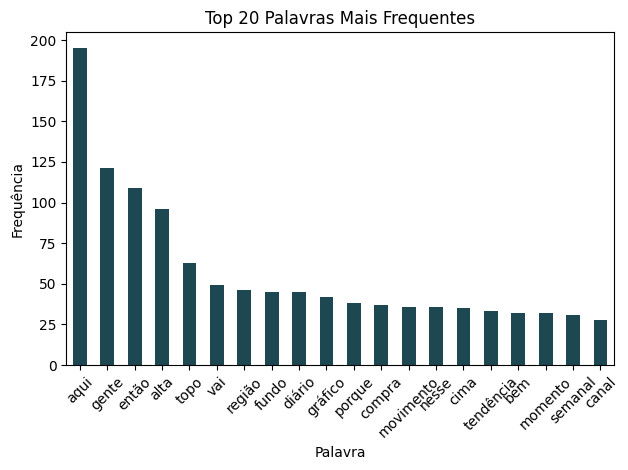

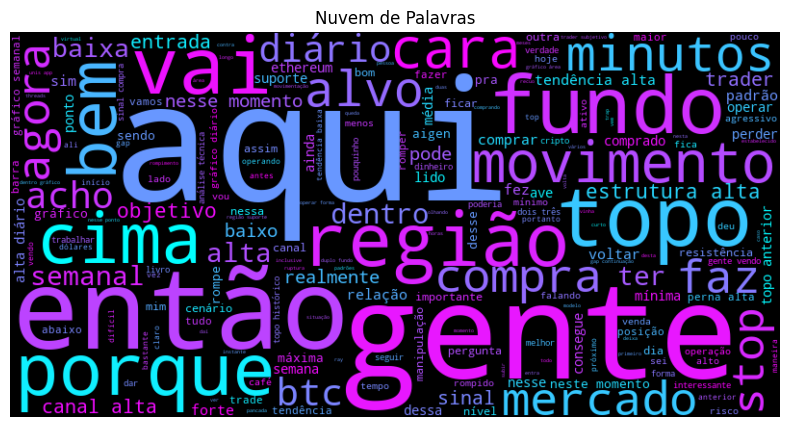

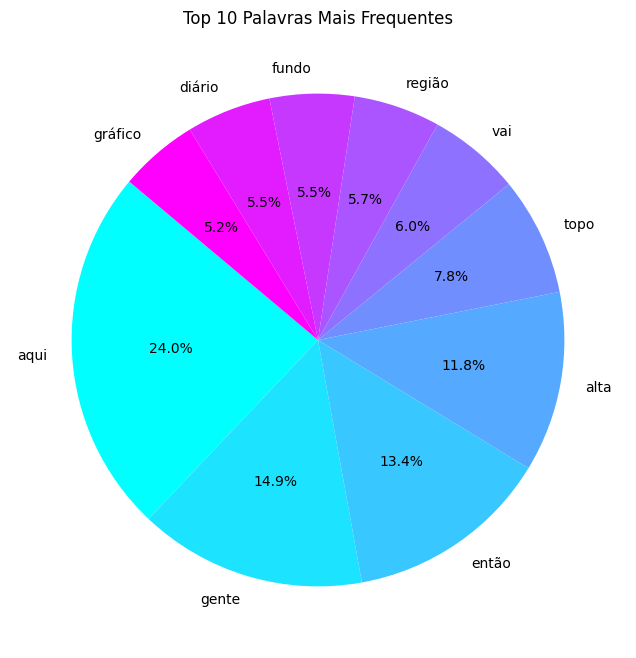

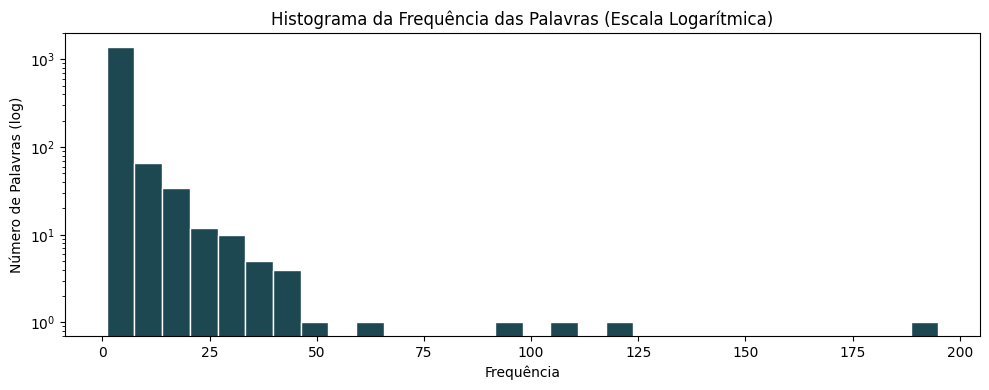


Palavras mais longas:
               Palavra  Tamanho  Frequência
198   sistematicamente       16           1
791    automaticamente       15           5
701    aproximadamente       15           3
1462   previsibilidade       15           1
659    particularmente       15           1

Palavras mais curtas:
    Palavra  Tamanho  Frequência
153     vai        3          49
3       bem        3          32
79      faz        3          25
154     ter        3          25
140     btc        3          23

📈 Média da Frequência: 3.54 (Palavra mais próxima: nier)
📊 Mediana: 1.0 (Palavra mais próxima: aqui)
🎯 Moda: 1 (Palavras: galera, movendo, vemos, downgrade, estados, unidos, amoriz, impactou, impactado, genete, incomodativa, segurando, considero, panho, cortar, estrange, virado, bot, virada, cia, desses, pastral, tolhar, respeita, despre, previsibilidade, feiti, moods, abriu, antropressão, devolveu, belecendo, ecoperando, retomando, cristal, corte, 244, imprevisível, bola, resto, abem, 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import nltk
from collections import Counter
import string

# Se rodar pela primeira vez:
# nltk.download('stopwords')

from nltk.corpus import stopwords

# Limpeza básica
texto = texto.lower()
for pontuacao in string.punctuation + "“”’‘–—…":
    texto = texto.replace(pontuacao, " ")
palavras = texto.split()
stopwords_pt = set(stopwords.words('portuguese'))
palavras_filtradas = [p for p in palavras if p not in stopwords_pt and len(p) > 2]

# Frequência das palavras
contagem = Counter(palavras_filtradas)
df = pd.DataFrame(contagem.items(), columns=["Palavra", "Frequência"]).sort_values("Frequência", ascending=False)

print("Top 20 palavras mais frequentes:\n", df.head(20))

# Gráfico de barras
plt.figure(figsize=(12, 5))
df.head(20).plot.bar(x="Palavra", y="Frequência", color="#1d4851", legend=False)
plt.title("Top 20 Palavras Mais Frequentes")
plt.xlabel("Palavra")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Nuvem de palavras
wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="cool",
    stopwords=stopwords_pt
).generate(" ".join(palavras_filtradas))

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras")
plt.show()

# Gráfico de pizza das top 10
df_top10 = df.head(10)
plt.figure(figsize=(8, 8))
plt.pie(df_top10["Frequência"], labels=df_top10["Palavra"], autopct='%1.1f%%', startangle=140, colors=plt.cm.cool(np.linspace(0,1,10)))
plt.title("Top 10 Palavras Mais Frequentes")
plt.show()

# Histograma log da frequência
plt.figure(figsize=(10, 4))
plt.hist(df["Frequência"], bins=30, color="#1d4851", edgecolor="white", log=True)
plt.title("Histograma da Frequência das Palavras (Escala Logarítmica)")
plt.xlabel("Frequência")
plt.ylabel("Número de Palavras (log)")
plt.tight_layout()
plt.show()

# Palavras mais longas/curtas
df["Tamanho"] = df["Palavra"].apply(len)
print("\nPalavras mais longas:")
print(df.nlargest(5, "Tamanho")[["Palavra", "Tamanho", "Frequência"]])
print("\nPalavras mais curtas:")
print(df.nsmallest(5, "Tamanho")[["Palavra", "Tamanho", "Frequência"]])

# Estatísticas básicas
media = np.mean(df["Frequência"])
mediana = np.median(df["Frequência"])
moda_valor = df["Frequência"].mode()[0]
palavra_media = df.iloc[(df["Frequência"] - media).abs().idxmin()]["Palavra"]
palavra_mediana = df.iloc[(df["Frequência"] - mediana).abs().idxmin()]["Palavra"]
palavras_moda = df[df["Frequência"] == moda_valor]["Palavra"].tolist()

print(f"\n📈 Média da Frequência: {media:.2f} (Palavra mais próxima: {palavra_media})")
print(f"📊 Mediana: {mediana} (Palavra mais próxima: {palavra_mediana})")
print(f"🎯 Moda: {moda_valor} (Palavras: {', '.join(palavras_moda)})")

# Bigramas mais frequentes
from itertools import tee, islice

def bigramas(lista):
    a, b = tee(lista)
    next(b, None)
    return zip(a, b)

bigramas_mais_frequentes = Counter(bigramas(palavras_filtradas))
df_bigramas = pd.DataFrame(bigramas_mais_frequentes.most_common(10), columns=["Bigramas", "Frequência"])
print("\nTop 10 bigramas mais frequentes:\n", df_bigramas)

# Insights automáticos
palavra_mais_frequente = df.iloc[0]["Palavra"]
print(f"""
💡 Insights:
• Palavra mais frequente: {palavra_mais_frequente}
• Total de palavras únicas: {df.shape[0]}
• Frequência média: {media:.2f}
• A nuvem de palavras destaca os principais termos visualmente.
""")
